<a href="https://colab.research.google.com/github/3zero69/-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch8_6_9(7_%EC%A0%9C%EC%99%B8)_pg_512_516%2C_529_543.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹

* 토픽 모델링 : 문서 집합에 숨어있는 주제를 찾아내는 것
 - 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약
 - 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출


1. LSA (Latent Semantic Analysis)
2. LDA (Latent Dirichlet Allocation)



### 20 뉴스 그룹 데이터 세트를 이용해 적용


1. LDA 토픽 모델링을 위해, 필요한 주제만 필터링해 추출하고 추출된 텍스트를 count 기반으로 벡터화 변환

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#8개 주제 추출
cats=['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df=fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

#LDA는 count 기반의 벡터화만 적용
count_vect=CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))

feat_vect=count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


> CounterVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터

피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링 수행
- 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 설정

In [2]:
lda=LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [3]:
print(lda.components_.shape) # components_ 개별 토픽별로 각 word 피처가 얼마나 많이 토픽에 할당 되었는지에 대한 수치
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

> 8 개의 토픽별로 1000개의 피처가 해당 토픽별로 연관도 값을 가짐
-  components_array의 0번째 row, 10번째 col에 있는 값은 topic 0에 대해 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 topic 0에서 연관되는 수치

각 토픽별로 연관도가 높은 순으로 word 나열

In [4]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes=topic.argsort()[::-1]
    top_indexes=topic_word_indexes[:no_top_words]

    #top_indexes 대상인 인덱스별로 feature_name에 해당하는 word feature 추출 후 join으로 concat
    feature_concat=' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

#CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names=count_vect.get_feature_names_out()

#토픽별 가장 연관도가 높은 word를 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


> - 명확하지 않고 일반적인 단어가 주를 이룸
- 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출
- 기독교에 관련된 주제어
- 의학에 관련된 주제어
- 윈도우 운영 체제와 관련된 주제어
- 일반적인 단어
- 중동 분쟁 등에 관련된 주제어
- 애매하지만 윈도우 운영 체제와 관련된 주제어

## 08. 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

* 코사인 유사도 : 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
  - 두 벡터 사이의 사잇각을 구해 얼마나 유사한지 수치로 적용

### 두 벡터사잇각
- 내적

코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유
1. 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움 
  - 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움
  - 문서가 매우 긴 경우 단어의 빈도수도 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교 불가

간단한 문서에 대해 문서 유사도 코사인 유사도 기반으로 구하기

In [5]:
#먼저 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수 생성
import numpy as np

def cos_similarity(v1, v2):
  dot_product=np.dot(v1, v2)
  l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity=dot_product/l2_norm

  return similarity
    

doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 tf-idf 벡터화된 행렬로 변환.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list=['if you take the blue pill, the story ends', 'if you take the red pill, you stay in Wonderland', 'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


반환된 행렬은 희소 행렬이므로 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환

In [7]:
#tfidfvectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense=feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect2=np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple=cos_similarity(vect1, vect2)
print('문장 1, 문장 2 코사인 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 코사인 유사도: 0.402


In [8]:
#첫번째 문장과 세번째 문장, 두번째 문장과 세번째 문장의 유사도도 측정.

vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple=cos_similarity(vect1, vect3)
print('문장 1, 문장 3 코사인 유사도: {0:.3f}'.format(similarity_simple))

vect2=np.array(feature_vect_dense[1]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple=cos_similarity(vect2, vect3)
print('문장 2, 문장 3 코사인 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 코사인 유사도: 0.404
문장 2, 문장 3 코사인 유사도: 0.456


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple) #앞이 기준, 뒤가 비교
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [10]:
# 1 이 거슬린다면,,
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:]) #앞이 기준, 뒤가 비교
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


모든 개별 문서에 쌍으로 코사인 유사도 값 계산

In [11]:
similarity_simple_pair=cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [29]:
from google.colab import drive
drive.mount("/content/drive")

# 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/ESAA_OB/topics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ESAA_OB/topics


In [30]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)
     

In [31]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download('punkt')
nltk.download('wordnet')

all_files=glob.glob(os.path.join('*.data'))
filename_list=[]
opinion_text=[]

for file_ in all_files:
  df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_=file_.split('\\')[-1]
  filename=filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', 
                           ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


호텔 군집화 데이터


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label=1인 데이터는 호텔로 군집화된 데이터. DF에서 해당 인덱스 추출
hotel_indexes=document_df[document_df['cluster_label']==0].index
print('호텔로 군집화 된 문서들의 df index:', hotel_indexes)

#호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시.
comparison_docname=document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도 #####')

'''document_df에서 추출한 index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair=cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 df index: Int64Index([7, 8, 12, 13, 16, 23, 25, 26, 28, 48], dtype='int64')
##### 비교 기준 문서명  comfort_toyota_camry_2007 와 타 문서 유사도 #####
[[1.         0.83969704 0.24145336 0.24626359 0.27804647 0.29443403
  0.27273923 0.51181434 0.22182484 0.07459289]]


첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화

Text(0.5, 1.0, 'comfort_toyota_camry_2007')

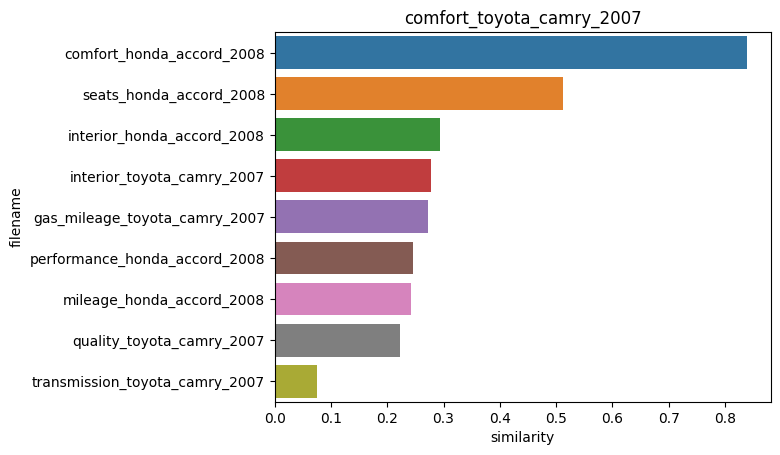

In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#첫번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index=similarity_pair.argsort()[:, ::-1]
sorted_index=sorted_index[:, 1:]

#유사도 큰 순으로 hotel_index를 추출해 재정렬
hotel_sorted_indexes=hotel_indexes[sorted_index.reshape(-1)]

#유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신 제외
hotel_1_sim_value=np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value=hotel_1_sim_value[1:]

#유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df=pd.DataFrame()
hotel_1_sim_df['filename']=document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)
     

## 09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### 한글 NLP 처리의 어려움

- 띄어쓰기
- 다양한 조사

### KONLPY 소개
한글 형태소 패키지
- 형태소 ; 단어로서 의미를 가지는 최소 단위

In [40]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA_OB/ratings_train.txt', sep='\t')
train_df.head(3)
     

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [41]:
#1이 긍정, 0이 부정
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

> 0과 1의 비율이 균등한 분포

In [42]:
import re

train_df=train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경 (정규 표현식으로 \d는 숫자를 의미)
train_df['document']=train_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

#테스트 데이터 세트를 로딩하고 동일하게 null 및 숫자를 공백으로 변환
test_df=pd.read_csv('ratings_test.txt', sep='\t')
test_df=test_df.fillna(' ')
test_df['document']=test_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

#id 칼럼 삭제
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [43]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.8 MB/s eta 0:00:00


TF-IDF 방식으로 단어 벡터화 
1. 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
  - SNS 분석에 적합한 Twittier 클래스 이용

In [44]:
from konlpy.tag import Okt

# twitter = Twitter()
okt = Okt()
def tw_tokenizer(text):
  #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko=okt.morphs(text)
  return tokens_ko

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#twitter 객체의 morphs() 객체를 이용한 tokenizer 사용. ngram_range=(1,2)
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train=tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2. 로지스틱 회귀를 이용한 분류 기반의 감성 분석 수행

In [46]:
#로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf=LogisticRegression(random_state=0)

#파라미터 C의 최적화를 위해 GridSearchCV 이용
params={'C':[1, 3.5, 4.5, 5.5, 10]}

grid_cv=GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


테스트 세트를 이용해 최종 감성 분석 예측 수행
- 테스트 세트를 통한 예측 시에는 학습시 적용한 TfidVectorizer 그대로 사용해야 함

In [47]:
from sklearn.metrics import accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환.
tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

#classifier는 gridsearchcv에서 최적 파라미터로 학습된 calssifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))
     

Logistic Regression 정확도: 0.86186
